In [1]:
import sys, os, glob, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import colors
import seaborn as sb
import torch

sys.path.append('../')
from src.dataset_large import ProtoPlanetaryDisks
#from src.utils import plot_recon_wall


main_path = os.path.dirname(os.getcwd())
save_plots = False
%matplotlib inline


In [2]:
dataset = ProtoPlanetaryDisks(machine='exalearn', 
                                  transform=False, 
                                  par_norm=True,
                                  subset='25052021',
                               image_norm='global')
print('Dataset length: ', len(dataset))

Dataset length:  72919


In [3]:
def plot_recon_wall(xhat, x, epoch=0, log=True):
    """Light-curves wall plot, function used during VAE training phase.
    Figure designed and ready to be appended to W&B logger.

    Parameters
    ----------
    xhat : numpy array
        Array of generated light curves
    x    : numpy array
        List of real light curves.
    epoch: int, optional
        Epoch number

    Returns
    -------
    fig
        a matplotlib figure
    image
        an image version of the figure
    """

    plt.close('all')
    ncols = 10
    fig, axis = plt.subplots(nrows=3, ncols=ncols, figsize=(ncols, 4))
    res = x - xhat
    
    for i in range(ncols):
        v_min = np.min(x[i, 0, :, :])
        v_max = np.max(x[i, 0, :, :])

        if log:
            # if imgs are stand then linthresh=1, linscale=100
            # if imgs are [0,1] then linthresh=.0005, linscale=10
            norm = colors.SymLogNorm(linthresh=0.005, linscale=1, 
                                     vmin=v_min, vmax=v_max, base=10.)
            #norm = colors.LogNorm(vmin=v_min, vmax=v_max)
        else:
            norm = None
        
        axis[0, i].imshow(x[i, 0, :, :], interpolation='bilinear',
                          cmap=cm.viridis, origin='upper', aspect='equal',
                          norm=norm)
        axis[1, i].imshow(xhat[i, 0, :, :], interpolation='bilinear',
                          cmap=cm.viridis, origin='upper', aspect='equal',
                          norm=norm)
        axis[2, i].imshow(res[i, 0, :, :],
                          interpolation='bilinear',
                          cmap=cm.RdBu, origin='upper', aspect='equal')

    for ax in axis.ravel():
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
    fig.subplots_adjust(wspace=0, hspace=0, left=0, right=1)
    fig.suptitle('Reconstruction [Epoch %s]' % epoch,
                 fontsize=20, y=.95)
    #fig.canvas.draw()
    return fig


In [15]:
idx = np.random.randint(0, dataset.imgs_test.shape[0], size=10)
real = dataset.imgs_test[idx]

In [21]:
reco = real + np.random.normal(loc=0, 
                               scale=0.000001, 
                               size=[idx.shape[0], 1, 187, 187])
# reco[reco <= 0] = 0.0

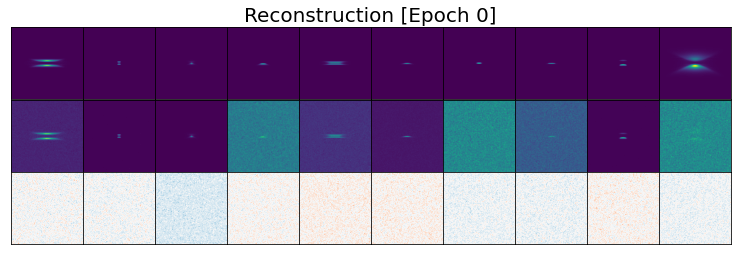

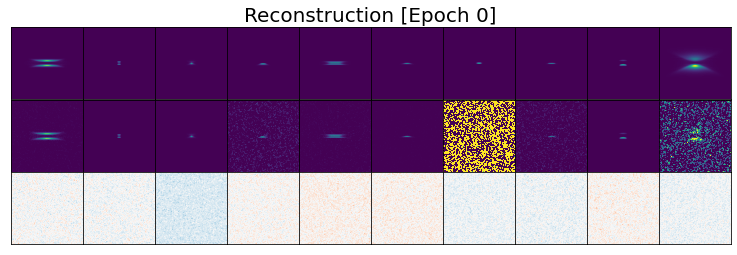

In [22]:
plot_recon_wall(reco, real, log=False)
plt.show()
plot_recon_wall(reco, real, log=True)
plt.show()

In [6]:
real = np.array([dataset[k][0] for k in range(0, 500, 10)])
reco = real + np.random.normal(loc=np.median(real), 
                               scale=np.median(real), 
                               size=[real.shape[0], 1, 187, 187])
reco[reco <= 0] = 0.0
real.shape, reco.shape

((50, 1, 187, 187), (50, 1, 187, 187))

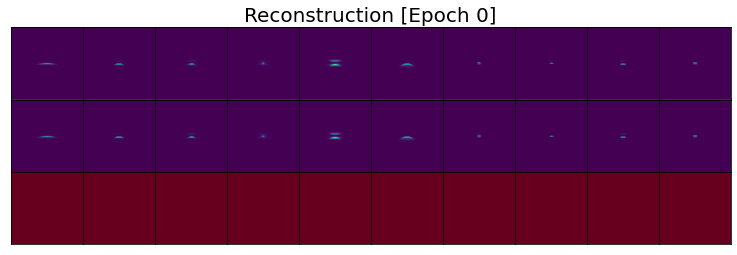

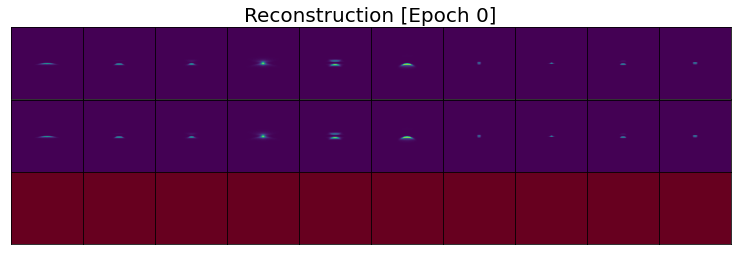

In [7]:
plot_recon_wall(reco, real, log=False)
plt.show()
plot_recon_wall(reco, real, log=True)
plt.show()